# 参考：[scikit-learn PCA类介绍](http://www.cnblogs.com/pinard/p/6243025.html)

/usr/local/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


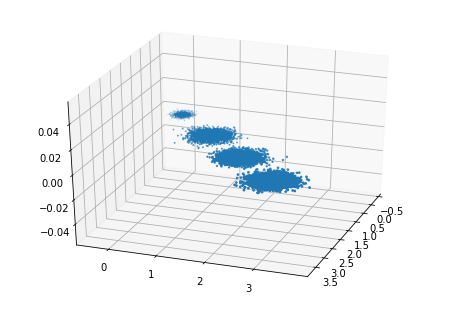

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

#### 1.先不做降维处理，直接用n_components=3去fit。投影后观察三个维度的方差分布

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print (">>>pca.explained_variance_ratio_:")
print (pca.explained_variance_ratio_)
print (">>>pca.explained_variance_:")
print (pca.explained_variance_)

>>>pca.explained_variance_ratio_:
[ 0.98318212  0.00850037  0.00831751]
>>>pca.explained_variance_:
[ 3.78521638  0.03272613  0.03202212]


 - 投影后三个特征维度的方差比例大约为98.3%：0.8%：0.8%。投影后第一个特征占了绝大多数的主成分比例

 #### 2.降维至二维

In [24]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
print (">>>pca.explained_variance_ratio_:")
print (pca.explained_variance_ratio_)
print (">>>pca.explained_variance_:")
print (pca.explained_variance_)

>>>pca.explained_variance_ratio_:
[ 0.98318212  0.00850037]
>>>pca.explained_variance_:
[ 3.78521638  0.03272613]


 - 投影到二维后选择了前两个特征，而抛弃第三个特征
 - 如下是降维后的数据分布，仍然可以看到四个簇

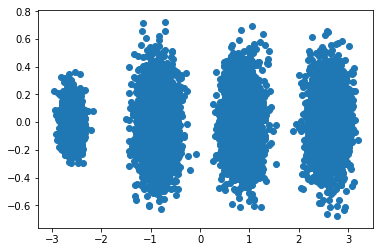

In [27]:
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

#### 3.不直接指定降维的维度，而指定降维后的主成分至少占比95%

In [28]:
pca = PCA(n_components=0.95)
pca.fit(X)
print (">>>pca.explained_variance_ratio_")
print (pca.explained_variance_ratio_)
print (">>>pca.explained_variance_")
print (pca.explained_variance_)
print (">>>pca.n_components_")
print (pca.n_components_)

>>>pca.explained_variance_ratio_
[ 0.98318212]
>>>pca.explained_variance_
[ 3.78521638]
>>>pca.n_components_
1


#### 4.设定降维后主成分99%（这次会挑出两个特征，这俩加起来能够达到99%）

In [33]:
pca = PCA(n_components=0.99)
pca.fit(X)
print (">>>pca.explained_variance_ratio_")
print (pca.explained_variance_ratio_)
print (">>>pca.explained_variance_")
print (pca.explained_variance_)
print (">>>pca.n_components_")
print (pca.n_components_)

>>>pca.explained_variance_ratio_
[ 0.98318212  0.00850037]
>>>pca.explained_variance_
[ 3.78521638  0.03272613]
>>>pca.n_components_
2


#### 5.使用mle算法自动选择维度

In [36]:
pca = PCA(n_components='mle')
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

TypeError: '>=' not supported between instances of 'str' and 'int'